In [32]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [33]:
def get_separable_line_y(x, line_x1, line_x2, min_y, max_y):
    y = min_y + (x - line_x1) * (max_y - min_y) / (line_x2 - line_x1)
    return y


def generate_positive_point(min_x, line_x1, line_x2, min_y, max_y):
    x = random.uniform(min_x, max(line_x1, line_x2))
    if x < min(line_x1, line_x2):
        y = random.uniform(min_y, max_y)
    else:
        if line_x1 < line_x2:
            y = random.uniform(get_separable_line_y(x, line_x1, line_x2, min_y, max_y), max_y)
        else:
            y = random.uniform(min_y, get_separable_line_y(x, line_x1, line_x2, min_y, max_y))
    return x, y


def generate_negative_point(max_x, line_x1, line_x2, min_y, max_y):
    x = random.uniform(min(line_x1, line_x2), max_x)
    if x > max(line_x1, line_x2):
        y = random.uniform(min_y, max_y)
    else:
        if line_x1 < line_x2:
            y = random.uniform(min_y, get_separable_line_y(x, line_x1, line_x2, min_y, max_y))
        else:
            y = random.uniform(get_separable_line_y(x, line_x1, line_x2, min_y, max_y), max_y)
    return x, y


def generate_linearly_separable_sample(min_x, max_x, min_y, max_y, n, p):
    if min_x >= max_x or min_y > max_y:
        raise ValueError("illegal rectangle bounds")
    line_x1 = random.uniform(min_x, max_x)
    line_x2 = random.uniform(min_x, max_x)
    positive_points = []
    for i in xrange(1, p + 1):
        positive_points.append((generate_positive_point(min_x, line_x1, line_x2, min_y, max_y), 1))
    negative_points = []
    for i in xrange(1, n + 1):
        negative_points.append((generate_negative_point(max_x, line_x1, line_x2, min_y, max_y), -1))
    sample = positive_points + negative_points
    return sample

    
def draw_sample(sample, min_x, max_x, min_y, max_y):
    x = [point[0][0] for point in sample]
    y = [point[0][1] for point in sample]
    fig = plt.figure()
    rec = fig.add_subplot(111, aspect='equal')
    rec.add_patch(Rectangle((min_x, min_y), max_x-min_x, max_y-min_y, alpha=0.4,facecolor="y"))
    sample_plot = fig.add_subplot(111, aspect='equal')
    sample_plot.plot(x, y, marker='.', linestyle='none')
    plt.show()

In [38]:
def check(point, w):
    result = w[0]*point[1]
    for i in xrange(len(point)):
        result += w[i + 1] * point[0][i]*point[1]
    return result

def batch_perceptron(sample):
    w = [0.0 for i in xrange(3)]
    stop = False
    step_count = 0
    while not stop:
        step_count += 1
        stop = True
        for point in sample:
            if (check(point, w) <= 0):
                stop = False
                w[0] += point[1]
                for i in xrange(len(w)-1):
                    w[i + 1] += point[0][i]*point[1]
    else:
        min_indention = min([check(point, w) for point in sample])
    return (w, min_indention, step_count)
    

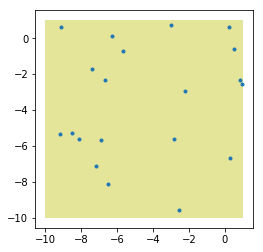

w: [-38.0, -10.794070604061606, 4.544320562243191]  min indention: 1.90948876798  step count: 45


In [40]:
min_x = -10
max_x = 1
min_y = -10
max_y = 1
k = 10
p = n = k
sample = generate_linearly_separable_sample(min_x, max_x, min_y, max_y, p, n)
draw_sample(sample, min_x, max_x, min_y, max_y)
perceptron_result = batch_perceptron(sample)
print "w:", perceptron_result[0], " min indention:", perceptron_result[1], " step count:", perceptron_result[2]

In [41]:
def get_count_steps_in_average(k, min_x, max_x, min_y, max_y):
    p=n=k
    count_of_iterations = 100
    steps_in_average = 0;
    for i in xrange(count_of_iterations + 1):
        sample = generate_linearly_separable_sample(min_x, max_x, min_y, max_y, p, n)
        perceptron_result = batch_perceptron(sample)
        steps_in_average += perceptron_result[2]
    steps_in_average /= count_of_iterations
    return k, steps_in_average

In [ ]:
min_x = -10
max_x = 1
min_y = -10
max_y = 1
steps = [get_count_steps_in_average(k, min_x, max_x, min_y, max_y) for k in xrange(1, 101)]
print steps